In [2]:
import pandas as pd
import os
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
non_demented_paths = []
very_mild_demented_paths = []
mild_demented_paths = []
moderate_demented_paths = []

# Download per category
def append_file_paths(directory, target_list):
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            target_list.append(os.path.join(dirname, filename))

append_file_paths('Data/Non Demented', non_demented_paths)
append_file_paths('Data/Very mild Dementia', very_mild_demented_paths)
append_file_paths('Data/Mild Dementia', mild_demented_paths)
append_file_paths('Data/Moderate Dementia', moderate_demented_paths)

In [4]:
non_demented=non_demented_paths[0:488]
mild_demented=mild_demented_paths[0:488]
very_mild_demented=very_mild_demented_paths[0:488]
moderate_demented = moderate_demented_paths

In [5]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [6]:
encoded_labels = []

def process_images(image_list, label):
    for s in image_list:
        img = Image.open(s)
        img = img.resize((128,128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(np.array(img))
            encoded_labels.append(encoder.transform([[label]]).toarray())

data = []
result = []

process_images(non_demented, 0)
process_images(mild_demented, 1)
process_images(moderate_demented, 2)
process_images(very_mild_demented, 3)
#print(encoded_labels)
result = np.array(encoded_labels)
result

array([[[1., 0., 0., 0.]],

       [[1., 0., 0., 0.]],

       [[1., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 1.]],

       [[0., 0., 0., 1.]],

       [[0., 0., 0., 1.]]])

In [7]:
X=np.array(data)
X.shape

(1952, 128, 128, 3)

In [8]:
y = result.reshape(X.shape[0],4)
y = np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#creating model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))


model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
history= model.fit(X_train,y_train, validation_split=0.2,epochs=50,callbacks=[early_stopping],batch_size=32)
model.evaluate(X_test,y_test)

Epoch 1/50
39/39 [==============================] - 39s 937ms/step - loss: 6.2334 - accuracy: 0.4135 - val_loss: 3.1221 - val_accuracy: 0.2492
Epoch 2/50
39/39 [==============================] - 38s 985ms/step - loss: 0.8843 - accuracy: 0.6378 - val_loss: 1.0536 - val_accuracy: 0.4856
Epoch 3/50
39/39 [==============================] - 35s 907ms/step - loss: 0.6988 - accuracy: 0.7043 - val_loss: 0.8284 - val_accuracy: 0.6901
Epoch 4/50
39/39 [==============================] - 35s 896ms/step - loss: 0.6114 - accuracy: 0.7524 - val_loss: 0.9821 - val_accuracy: 0.6230
Epoch 5/50
39/39 [==============================] - 35s 900ms/step - loss: 0.5452 - accuracy: 0.7780 - val_loss: 0.6989 - val_accuracy: 0.6965
Epoch 6/50
39/39 [==============================] - 34s 883ms/step - loss: 0.4497 - accuracy: 0.8093 - val_loss: 0.6526 - val_accuracy: 0.7220
Epoch 7/50
39/39 [==============================] - 34s 880ms/step - loss: 0.3718 - accuracy: 0.8558 - val_loss: 0.5146 - val_accuracy: 0.8211

[0.36528876423835754, 0.9156010150909424]

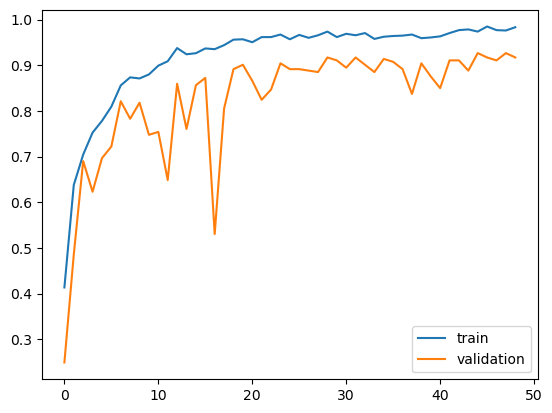

In [35]:
%matplotlib inline 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()